In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

# 그래프 기본 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 1. 회원정보

In [3]:
df1 = pd.read_parquet('open/train/1.회원정보/201807_train_회원정보.parquet')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 78 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   기준년월                400000 non-null  int64  
 1   ID                  400000 non-null  object 
 2   남녀구분코드              400000 non-null  int64  
 3   연령                  400000 non-null  object 
 4   Segment             400000 non-null  object 
 5   회원여부_이용가능           400000 non-null  int64  
 6   회원여부_이용가능_CA        400000 non-null  int64  
 7   회원여부_이용가능_카드론       400000 non-null  int64  
 8   소지여부_신용             400000 non-null  int64  
 9   소지카드수_유효_신용         400000 non-null  int64  
 10  소지카드수_이용가능_신용       400000 non-null  int64  
 11  입회일자_신용             400000 non-null  int64  
 12  입회경과개월수_신용          400000 non-null  int64  
 13  회원여부_연체             400000 non-null  int64  
 14  이용거절여부_카드론          400000 non-null  int64  
 15  동의여부_한도증액안내         400000 non-nul

In [4]:
df1.head()

,기준년월,ID,남녀구분코드,연령,Segment,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,...,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,Life_Stage,최종카드발급경과월
0,201807,TRAIN_000000,2,40대,D,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),22
1,201807,TRAIN_000001,1,30대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),18
2,201807,TRAIN_000002,1,30대,C,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀출산기,20
3,201807,TRAIN_000003,2,40대,D,1,1,0,1,2,...,0,0,0,0개,0개,0개,0개,1,자녀성장(2),17
4,201807,TRAIN_000004,2,40대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,1,자녀성장(1),15


### 기준년월

In [8]:
# 기준년월
df1['기준년월'].unique()

array([201807])

### ID

In [26]:
# ID
print(df1['ID'].nunique())
print(df1['ID'].isna().sum())
df1['ID'].dtype

400000
0


dtype('O')

### 남녀구분코드

In [42]:
# 남녀 구분코드
print(df1['남녀구분코드'].unique())
print(df1['남녀구분코드'].isna().sum())
df1['남녀구분코드'].value_counts()

[2 1]
0


남녀구분코드
1    209218
2    190782
Name: count, dtype: int64

### 연령

In [38]:
# 연령
print(df1['연령'].unique())
print(df1['연령'].isna().sum())
df1['연령'].value_counts()

['40대' '30대' '20대' '60대' '50대' '70대이상']
0


연령
40대      122191
30대       98691
50대       91057
60대       41165
20대       31980
70대이상     14916
Name: count, dtype: int64

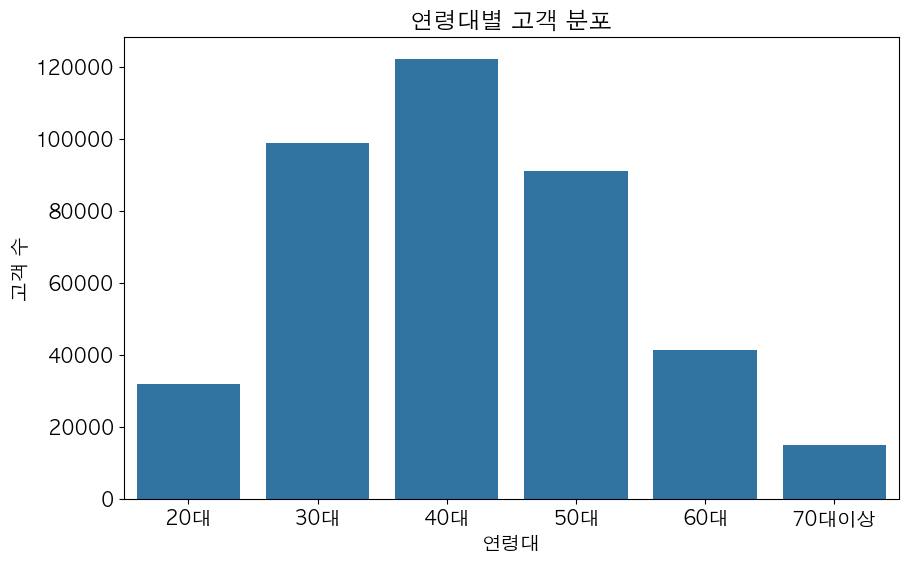

In [64]:
# 연령대 그래프
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='연령', order=['20대', '30대', '40대', '50대', '60대', '70대이상'])
plt.title('연령대별 고객 분포')
plt.xlabel('연령대')
plt.ylabel('고객 수')
plt.show()

### Segment

In [66]:
# Segment
print(df1['Segment'].unique())
print(df1['Segment'].isna().sum())
df1['Segment'].value_counts()

['D' 'E' 'C' 'A' 'B']
0


Segment
E    320342
D     58207
C     21265
A       162
B        24
Name: count, dtype: int64

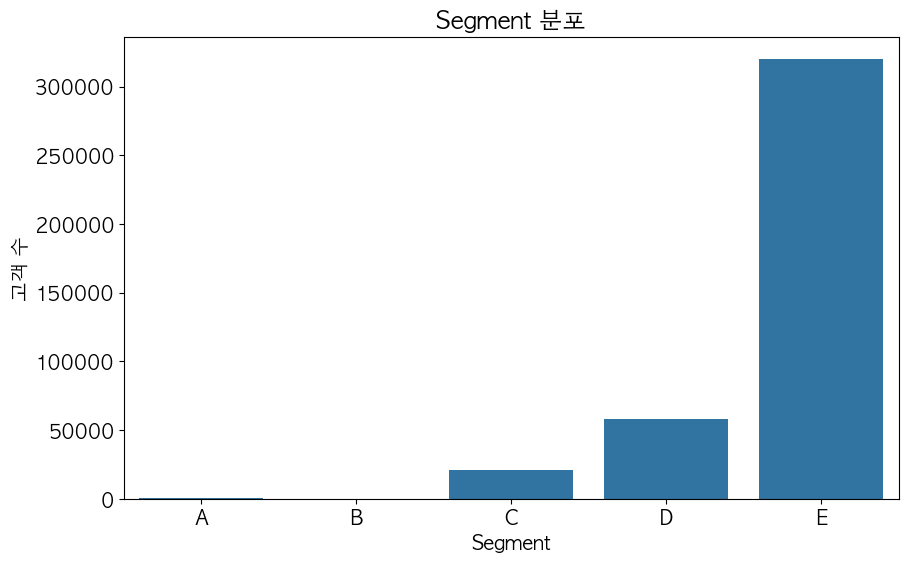

In [70]:
# Segment 그래프
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='Segment', order=['A', 'B', 'C', 'D', 'E'])
plt.title('Segment 분포')
plt.xlabel('Segment')
plt.ylabel('고객 수')
plt.show()

In [84]:
# E의 비율
a1 = (df1['Segment']=='E').sum()
a1
a1/len(df1['Segment'])

0.800855

### 회원여부_이용가능

In [101]:
# Segment
print(f'요소들 : {df1['회원여부_이용가능'].unique()}')
print(f'결측치 : {df1['회원여부_이용가능'].isna().sum()}')
df1['회원여부_이용가능'].value_counts()

요소들 : [1 0]
결측치 : 0


회원여부_이용가능
1    382820
0     17180
Name: count, dtype: int64

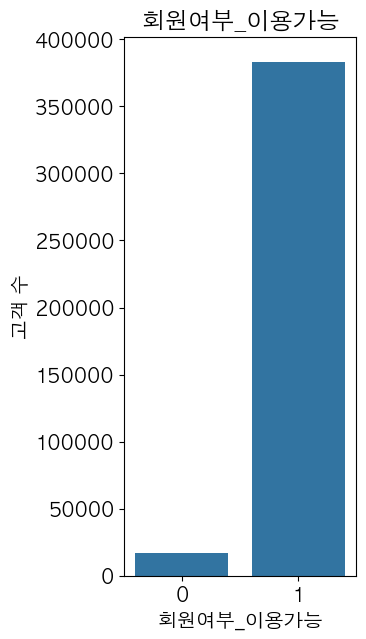

In [121]:
# 회원여부_이용가능 그래프
plt.figure(figsize=(3, 7))
sns.countplot(data=df1, x='회원여부_이용가능')
plt.title('회원여부_이용가능')
plt.xlabel('회원여부_이용가능')
plt.ylabel('고객 수')
plt.show()

### 기준년월
 - yyyymm로 이루어진 정수형 데이터
 - 데이터프레임 병합시 필요

### ID
- 0부터 1씩 증가하는 아이디 값. 굳이 필요한가?
- 삭제 예정? Train만 남기기?

### 남녀구분코드
- 남/녀가 2/1로 구분되어있는 정수형 데이터
- 어느쪽이 남잔지 여잔지 모른다
- 아마도 주민등록 뒷자리 1번이긴 할듯
- 비율은 거의 반반

### 연령
- '20대' ~ '70대이상' 범주형 변수
- 40대가 최빈

### Segment
- 예측해야하는 값.(test에는 없다)
- 'A', 'B', 'C', 'D', 'E' 범주형
- E가 최빈값(80%정도)

### 회원여부_이용가능
- 이용가능 여부가 0, 1로 나눠진 범주형
- 아마 1이 이용 가능인듯?



